# Gif Creation in Qiskit

In [59]:
from qiskit import *
from qiskit.tools.visualization import *
import numpy as np
import math

In [14]:

parameters=[0.4,0.7,0.8,0.9]
backend_stvec = Aer.get_backend('statevector_simulator')
circuit = QuantumCircuit(1)
random_bits = []
states = []

def add_state(circ):
    job = execute(circ, backend=backend_stvec, shots=1, memory=True)
    job_result = job.result()
    vec = np.around(job_result.get_statevector(circ))
    states.append(vec)



    
#loop on parameters, for each iteration modify circuit
for i in range(len(parameters)):

    
    #circuit = circuit.compose(RZGate(parameters[i]))

    add_state(circuit)


In [15]:
imgs = []
for qstate in states:
    imgs.append(plot_bloch_multivector(qstate))

In [16]:
import matplotlib.pyplot as plt
import pylab as pl
import imageio
import os

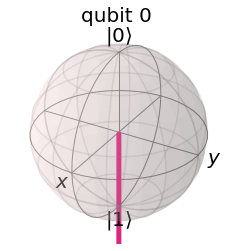

In [17]:
for i, img in enumerate(imgs):
    pl.figure(img)
    path = './img/'+str(i)+'.png'
    plt.savefig(path)

In [18]:
with imageio.get_writer('state_evolution.gif', mode='I') as writer:
    img_names = sorted([f for f in os.listdir('./img') if 'png' in f])
    for filename in img_names:
        filename = './img/'+filename
        image = imageio.imread(filename)
        writer.append_data(image)